<a href="https://colab.research.google.com/github/Rachita-G/Python_Practice/blob/main/Projects/Working_with_Churn_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Analysis

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
ch=pd.read_csv("churn_data.csv")

In [ ]:
ch.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


In [ ]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
state                            5000 non-null object
account_length                   5000 non-null int64
area_code                        5000 non-null object
international_plan               5000 non-null object
voice_mail_plan                  5000 non-null object
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes               5000 non-null float64
total_intl_calls           

In [ ]:
ch.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
list(ch.select_dtypes(include=['object']))

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [ ]:
Churn=pd.get_dummies(ch['churn'],drop_first=True,columns=['churn-yes or no'])
IntPlan=pd.get_dummies(ch['international_plan'],drop_first=True,columns=['int_plan'])
VoiceMailPlan=pd.get_dummies(ch['voice_mail_plan'],drop_first=True,columns=['voice_mail_plan'])

In [ ]:
ch.drop(['churn','international_plan', 'voice_mail_plan','area_code'],axis=1,inplace=True)

In [ ]:
ch.head()

,state,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,HI,101,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3
1,MT,137,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0
2,OH,103,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1
3,NM,99,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1
4,SC,108,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2


In [ ]:
ch=pd.concat([ch,Churn,IntPlan,VoiceMailPlan],axis=1)

In [ ]:
ch.head()

,state,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,yes,yes,yes
0,HI,101,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0,0,0
1,MT,137,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0,0,0
2,OH,103,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0,0,1
3,NM,99,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0,0,0
4,SC,108,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0,0,0


In [ ]:
ch.columns=['state', 'account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn', 'int_plan', 'voice_mail_plan']

In [ ]:
ch.head()

,state,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,int_plan,voice_mail_plan
0,HI,101,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0,0,0
1,MT,137,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0,0,0
2,OH,103,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0,0,1
3,NM,99,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0,0,0
4,SC,108,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0,0,0


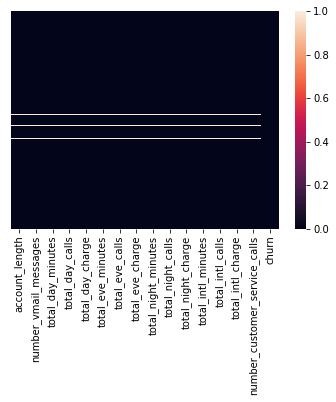

In [ ]:
ch['total_day_minutes'][2]
sns.heatmap(ch.isnull(),yticklabels=False)  ##no missing values

In [ ]:
ch.isnull().sum()

account_length                   71
number_vmail_messages            71
total_day_minutes                71
total_day_calls                  71
total_day_charge                 71
total_eve_minutes                71
total_eve_calls                  71
total_eve_charge                 71
total_night_minutes              71
total_night_calls                71
total_night_charge               71
total_intl_minutes               71
total_intl_calls                 71
total_intl_charge                71
number_customer_service_calls    71
churn                             0
dtype: int64

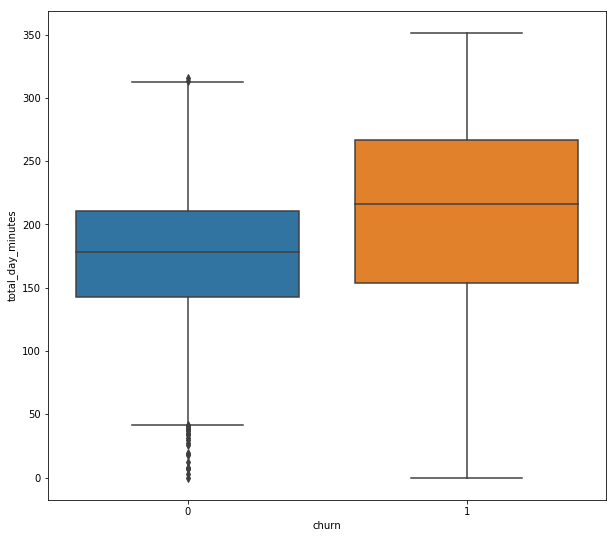

In [ ]:
plt.figure(figsize=(10,9))
sns.boxplot(x='churn',y='total_day_minutes',data=ch)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
independent_variables = ['total_day_minutes',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_charge']
# use the list to select a subset from original DataFrame
X = ch[independent_variables]
y = ch['churn']
thresh = 10
for i in np.arange(0,len(independent_variables)):
    vif = [variance_inflation_factor(X[independent_variables].values, ix) for ix in range(X[independent_variables].shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print("vif :", vif)
        print('dropping \'' + X[independent_variables].columns[maxloc] + '\' at index: ' + str(maxloc))
        del independent_variables[maxloc]
    else:
        break

    print('Final variables:', independent_variables)

vif : [124361520.57653692, 124365521.42561892, 37202778.92267031, 37203154.31797981, 10556634.913207026, 10556647.013630992, 1009169.4622221742, 1009622.2003727057]
dropping 'total_day_charge' at index: 1
Final variables: ['total_day_minutes', 'total_eve_minutes', 'total_eve_charge', 'total_night_minutes', 'total_night_charge', 'total_intl_minutes', 'total_intl_charge']
vif : [9.784680455488488, 37200408.25271165, 37200793.279727645, 10554707.68710033, 10554727.95843938, 1009160.3369525103, 1009613.0855861736]
dropping 'total_eve_charge' at index: 2
Final variables: ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_night_charge', 'total_intl_minutes', 'total_intl_charge']
vif : [9.784677596426281, 12.03127839748505, 10553630.375615599, 10553650.210020248, 1009145.4211038677, 1009598.3990872669]
dropping 'total_night_charge' at index: 3
Final variables: ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes', 'total_intl_charge']
vif

In [ ]:
ch.head()

,state,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,int_plan,voice_mail_plan
0,HI,101,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0,0,0
1,MT,137,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0,0,0
2,OH,103,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0,0,1
3,NM,99,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0,0,0
4,SC,108,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=ch.drop(['churn','state'],axis=1)

In [ ]:
y=ch['churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
lr=LogisticRegression()

In [ ]:
list(ch.select_dtypes(include=['object']))

['state']

In [ ]:
selector=RFE(lr,2)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
rfe=selector.fit(X,y)

In [ ]:
print(rfe.support_)

[False False False False False False False False False False False False
 False False False  True  True]


In [ ]:
print(rfe.ranking_)

[16  7  9 15  4 10 11 14 13 12  6  5  3  8  2  1  1]


In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
selector=RFECV(lr)

In [ ]:
rfecv=selector.fit(X,y)

In [ ]:
print(rfecv.support_)

[False  True False False  True False False False False False  True  True
  True  True  True  True  True]


In [ ]:
print(rfecv.ranking_)

[9 1 2 8 1 3 4 7 6 5 1 1 1 1 1 1 1]


In [ ]:
rfecv

RFECV(cv='warn',
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [ ]:
print(rfecv.n_features_)

9


In [ ]:
print(X.columns[rfecv.support_])

Index(['number_vmail_messages', 'total_day_charge', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'int_plan', 'voice_mail_plan'],
      dtype='object')


In [ ]:
X.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'int_plan', 'voice_mail_plan'],
      dtype='object')

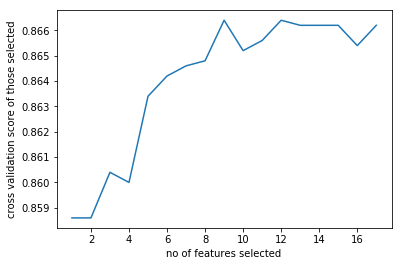

In [ ]:
plt.figure()
plt.xlabel('no of features selected')
plt.ylabel('cross validation score of those selected')
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)
plt.show()

In [ ]:
rfecv.grid_scores_

array([0.85860007, 0.85860007, 0.86040031, 0.86000063, 0.86340091,
       0.86420027, 0.86460019, 0.86480051, 0.86640019, 0.86520043,
       0.86560035, 0.86639983, 0.86619999, 0.86619999, 0.86620011,
       0.86539979, 0.86620011])

In [ ]:
range(1,len(rfecv.grid_scores_)+1)

range(1, 18)

In [ ]:
##detecting outliers

In [ ]:
outliers=[]
def detect_outlier(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    for y in data:
        z_score = (y-mean)/std
    if np.abs(z_score)>threshold:
        outliers.append(y)
    return outliers

In [ ]:
ch.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [ ]:
x=[ 'account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'int_plan',
       'voice_mail_plan']

In [ ]:
detect_outlier(ch['total_day_minutes'])

[]

In [ ]:
sns.boxplot('total_day_minutes',data=ch)

In [ ]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
state                            5000 non-null object
account_length                   5000 non-null int64
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes               5000 non-null float64
total_intl_calls                 5000 non-null int64
total_intl_charge                5000 non-null float64
number_customer_service_calls    5000 non-null int64
churn                       

In [ ]:
list(ch.select_dtypes(exclude='object'))

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'churn',
 'int_plan',
 'voice_mail_plan']

In [ ]:
ch[ch.columns[1:]]=ch[ch.columns[1:]].astype(float)

In [ ]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
state                            5000 non-null object
account_length                   5000 non-null float64
number_vmail_messages            5000 non-null float64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null float64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null float64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null float64
total_night_charge               5000 non-null float64
total_intl_minutes               5000 non-null float64
total_intl_calls                 5000 non-null float64
total_intl_charge                5000 non-null float64
number_customer_service_calls    5000 non-null float64
churn         

In [ ]:
ch_f=ch.select_dtypes(include='float')

In [ ]:
from scipy import stats
z=np.abs(stats.zscore(ch_f))
without_outliers=ch_f[(z<3).all(axis=1)]

In [ ]:
without_outliers.shape

(4292, 18)

In [ ]:
ch_f.shape

(5000, 18)

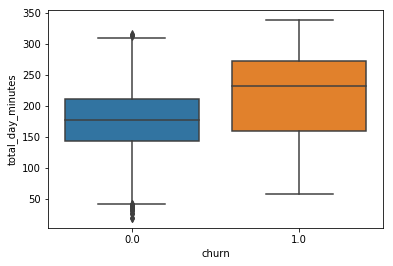

In [ ]:
sns.boxplot(without_outliers['churn'],without_outliers['total_day_minutes'])

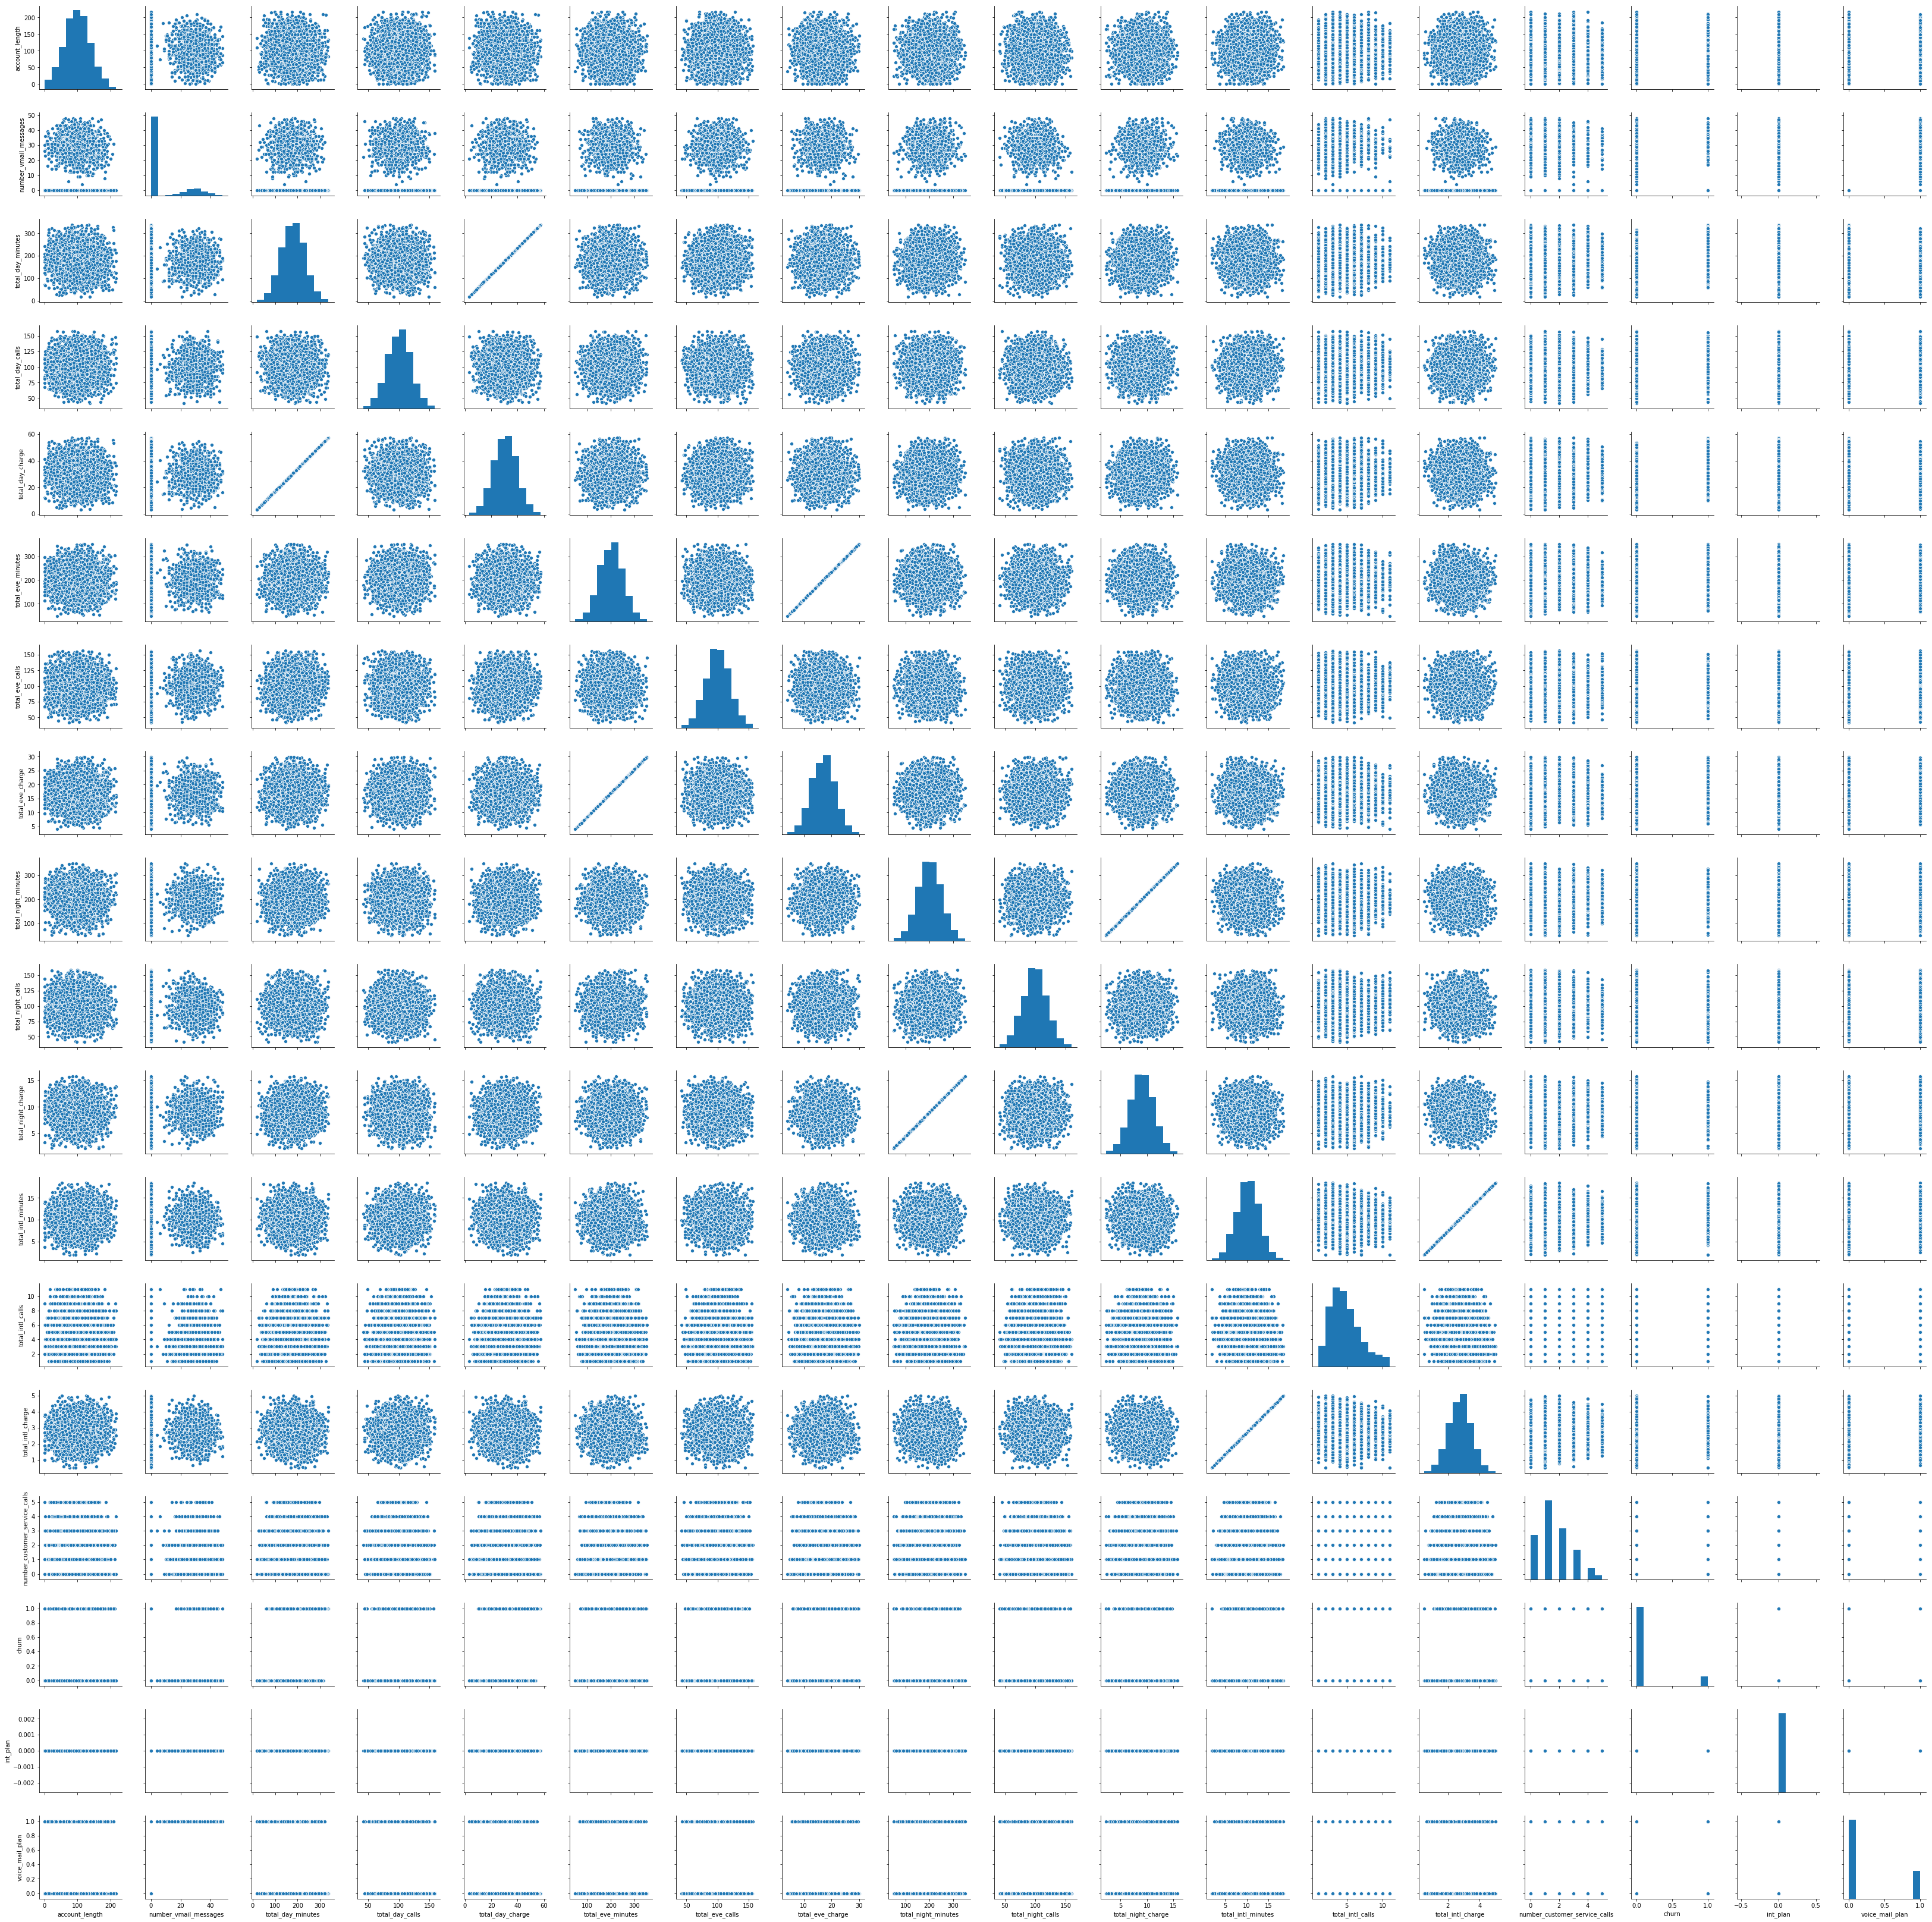

In [ ]:
sns.pairplot(without_outliers)

In [ ]:
q1=ch.quantile(0.25)
q3=ch.quantile(0.75)
iqr=q3-q1

In [ ]:
iqr

account_length                   54.000
number_vmail_messages            17.000
total_day_minutes                72.500
total_day_calls                  26.000
total_day_charge                 12.320
total_eve_minutes                67.725
total_eve_calls                  27.000
total_eve_charge                  5.760
total_night_minutes              67.800
total_night_calls                26.000
total_night_charge                3.050
total_intl_minutes                3.500
total_intl_calls                  3.000
total_intl_charge                 0.940
number_customer_service_calls     1.000
churn                             0.000
int_plan                          0.000
voice_mail_plan                   1.000
dtype: float64

In [ ]:
ch_out=ch_f[~((ch<(q1-4*iqr)) | (ch>(q3+4*iqr))).any(axis=1)]

In [ ]:
ch_out.shape

(4010, 18)

In [ ]:
ch.shape

(5000, 19)

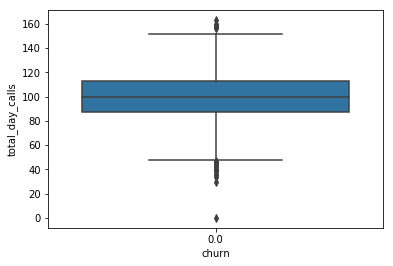

In [ ]:
sns.boxplot(ch_out['churn'],ch_out['total_day_calls'])

In [ ]:
ch_out.churn.unique()

array([0.])

In [ ]:
list=['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']

In [ ]:
new_ch=ch[list]

In [ ]:
q1=new_ch.quantile(0.25)
q3=new_ch.quantile(0.75)
iqr=q3-q1

In [ ]:
iqr

account_length                   54.000
number_vmail_messages            17.000
total_day_minutes                72.500
total_day_calls                  26.000
total_day_charge                 12.320
total_eve_minutes                67.725
total_eve_calls                  27.000
total_eve_charge                  5.760
total_night_minutes              67.800
total_night_calls                26.000
total_night_charge                3.050
total_intl_minutes                3.500
total_intl_calls                  3.000
total_intl_charge                 0.940
number_customer_service_calls     1.000
dtype: float64

In [ ]:
ch_out=new_ch[~((new_ch<(q1-3*iqr)) | (new_ch>(q3+3*iqr))).any(axis=1)]

In [ ]:
ch_out.shape

(4929, 15)

In [ ]:
ch=pd.concat([ch_out,ch.churn],axis=1)

In [ ]:
ch.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,101.0,0.0,70.9,123.0,12.05,211.9,73.0,18.01,236.0,73.0,10.62,10.6,3.0,2.86,3.0,0.0
1,137.0,0.0,223.6,86.0,38.01,244.8,139.0,20.81,94.2,81.0,4.24,9.5,7.0,2.57,0.0,0.0
2,103.0,29.0,294.7,95.0,50.10,237.3,105.0,20.17,300.3,127.0,13.51,13.7,6.0,3.70,1.0,0.0
3,99.0,0.0,216.8,123.0,36.86,126.4,88.0,10.74,220.6,82.0,9.93,15.7,2.0,4.24,1.0,0.0
4,108.0,0.0,197.4,78.0,33.56,124.0,101.0,10.54,204.5,107.0,9.20,7.7,4.0,2.08,2.0,0.0


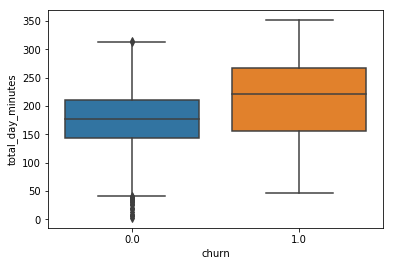

In [ ]:
sns.boxplot(ch['churn'],ch['total_day_minutes'])